# Chapter 3: Linear Regression for a housing dataset

### Importing the necessary packages

In [3]:
!git clone https://github.com/s7s/machine_learning_1
%cd  machine_learning_1/linear_regression
# https://docs.google.com/presentation/d/e/2PACX-1vRK_dORAlLxlvo72NRIA43T-6FpZLvqwW1ZaB_CL1BFTeN-g7aOC4ACXqI0uQCMmyNG4DanqiVffNPR/pub?start=false&loop=false&delayms=3000

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 350, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 350 (delta 54), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (350/350), 42.64 MiB | 16.66 MiB/s, done.
Resolving deltas: 100% (177/177), done.
/content/machine_learning_1/linear_regression


In [4]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [18]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


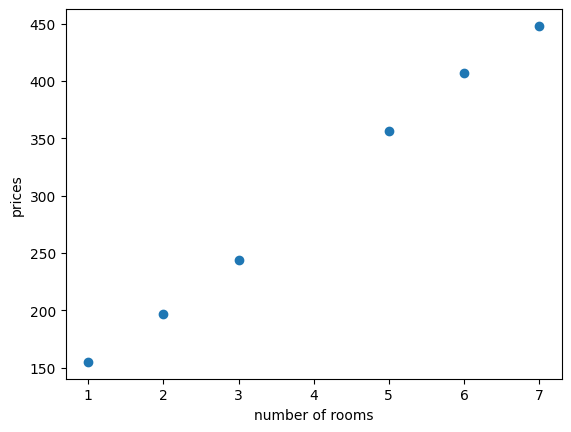

In [6]:
utils.plot_points(features, labels)

### Coding the tricks

- Simple trick
- Absolute trick
- Square trick

In [7]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room += small_random_1
        base_price -= small_random_2
    return price_per_room, base_price

In [12]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    #implement square_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price
    predicted_price=base_price+price_per_room*num_rooms
    base_price+= learning_rate*(price-predicted_price)         # (price-predicted_price) for sign
    price_per_room+=learning_rate*num_rooms*(price-predicted_price)
    return price_per_room, base_price

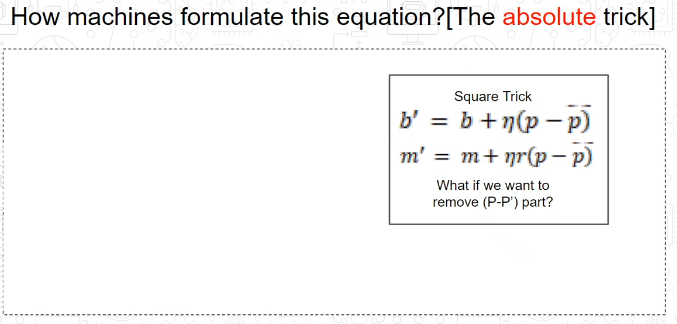

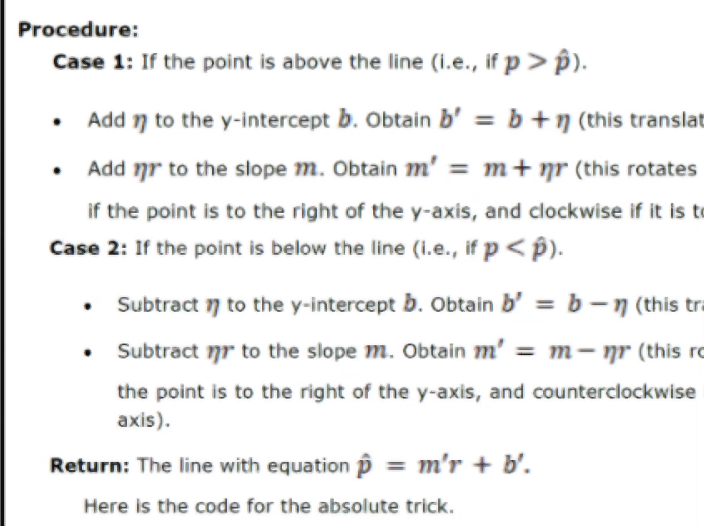

In [13]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    #implement absolute_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price
    predicted_price=base_price+price_per_room*num_rooms
    if predicted_price<price:
      base_price+= learning_rate
      price_per_room+=learning_rate*num_rooms
    elif predicted_price>price:
      base_price -= learning_rate
      price_per_room-=learning_rate*num_rooms

    return price_per_room, base_price

### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

Price per room: 61.838242430323824
Base price: 21.981703193311514


(61.838242430323824, 21.981703193311514)

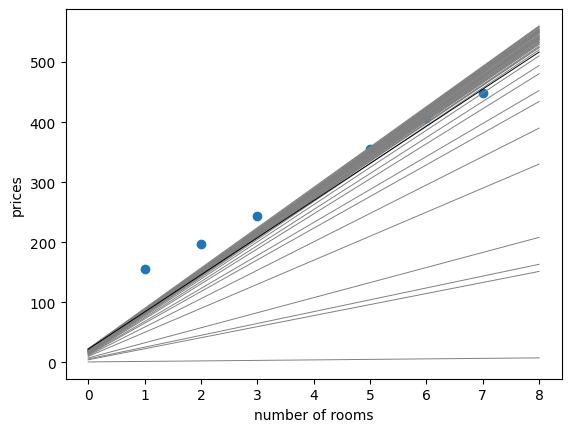

In [14]:
import random as rd

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room =  random.random() # start with random weight
    base_price =  random.random() # start with random bias
    ## TODO ##
    # for this number of epochs
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use square_trick fn or absolute_trick fn to update price_per_room and base_price
    for  epcho in range(epochs):

      if True:
        utils.draw_line(price_per_room, base_price, starting=0, ending=8)

      idx=rd.randint(0,len(features)-1)
      num_rooms=features[idx]
      price=labels[idx]
      price_per_room,base_price=square_trick(base_price, price_per_room, num_rooms, price, learning_rate)

    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels);
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
#plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 50)

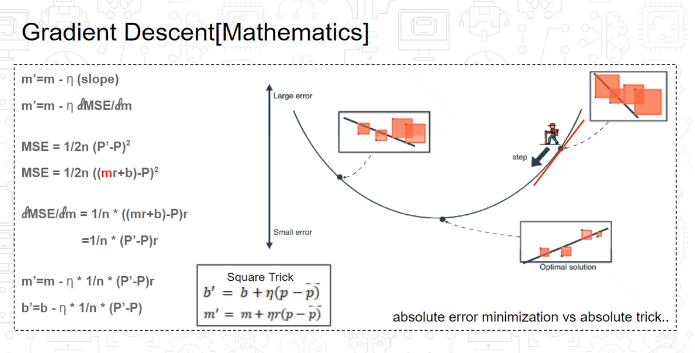

### Root mean squared error function

In [47]:
# The root mean square error function
def rmse(labels, predictions):
    n = len(labels)
    differences = np.subtract(labels, predictions)
    error = np.sqrt(1.0/n * (np.dot(differences, differences))) #use dot product for square
    return error

### Plotting the error function

Price per room: 50.15104138452706
Base price: 99.72808296297549


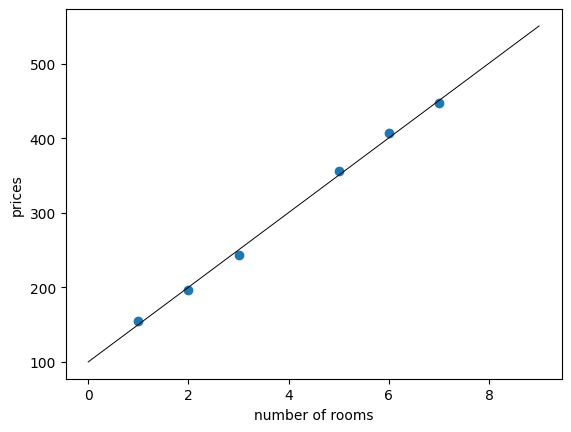

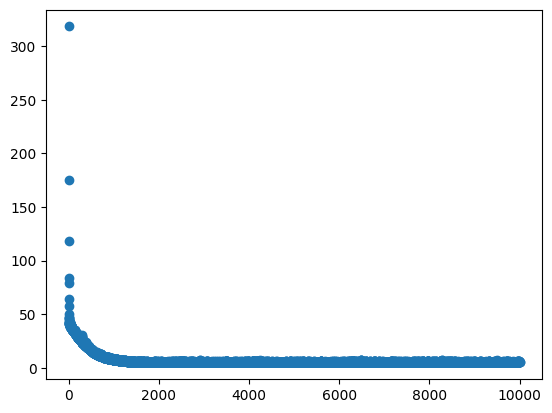

(50.15104138452706, 99.72808296297549)

In [50]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        #print(errors[i])
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)

    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

### Linear regression using sklearn



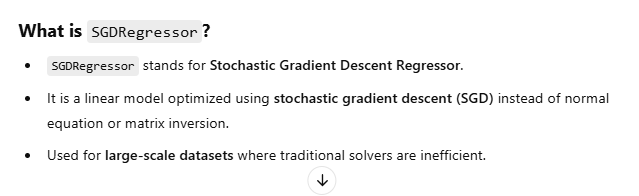

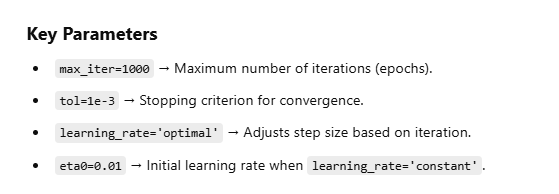

In [59]:
## TODO ##
# Use sklearn to implement linear regression that fit our data (features,labels )
from sklearn.linear_model import LinearRegression,SGDRegressor
model=LinearRegression()
model.fit(features.reshape(-1,1),labels)
model.score(features.reshape(-1,1),labels)

0.9979437166148433

In [61]:
## TODO ##
# print the coefficients and bias of this model
print("weights:",model.coef_)
print("intercept:",model.intercept_)

weights: [50.39285714]
intercept: 99.59523809523819


In [63]:
## TODO ##
# use this model to predict the price of house that contains 4 rooms
model.predict([[4]])

array([301.16666667])

### Normal Equation



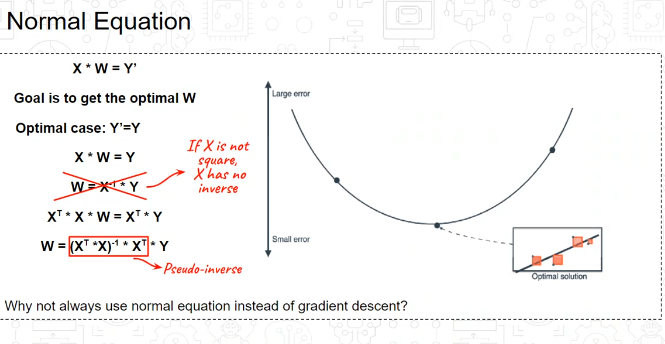

In [81]:
def Normal_Equation(features,labels):
    ## TODO ##
    # Use normal equation to get the weights
    # don't forget to concatenate ones to the features
    ones=np.ones(len(features))
    xt=np.vstack((ones,features))
    print(ones.shape,features.shape,xt.shape)
    x=xt.T
    W=np.linalg.inv(xt @ x) @xt@labels
    return W

W = Normal_Equation(features,labels)
print(W)

(6,) (6,) (2, 6)
[99.5952381  50.39285714]


### Real Example (Predict fuel efficiency)

In [83]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [166]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

#### Get data

In [145]:
url = '/content/auto-mpg.csv'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url,na_values='?')

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
dataset = raw_dataset.drop(columns=['car name']).copy()
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


#### Clean data

In [169]:
dataset.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0


In [170]:
dataset = dataset.dropna()

In [171]:
dataset.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0


In [172]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [133]:
print(dataset['origin'].unique())  # test Find unexpected values



[1 3 2]


In [176]:
dataset['origin'] = dataset['origin'].astype(int)
dataset['origin'] = dataset['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


In [177]:
dataset = pd.get_dummies(dataset, columns=['origin'], prefix='', prefix_sep='',dtype=int)

In [178]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


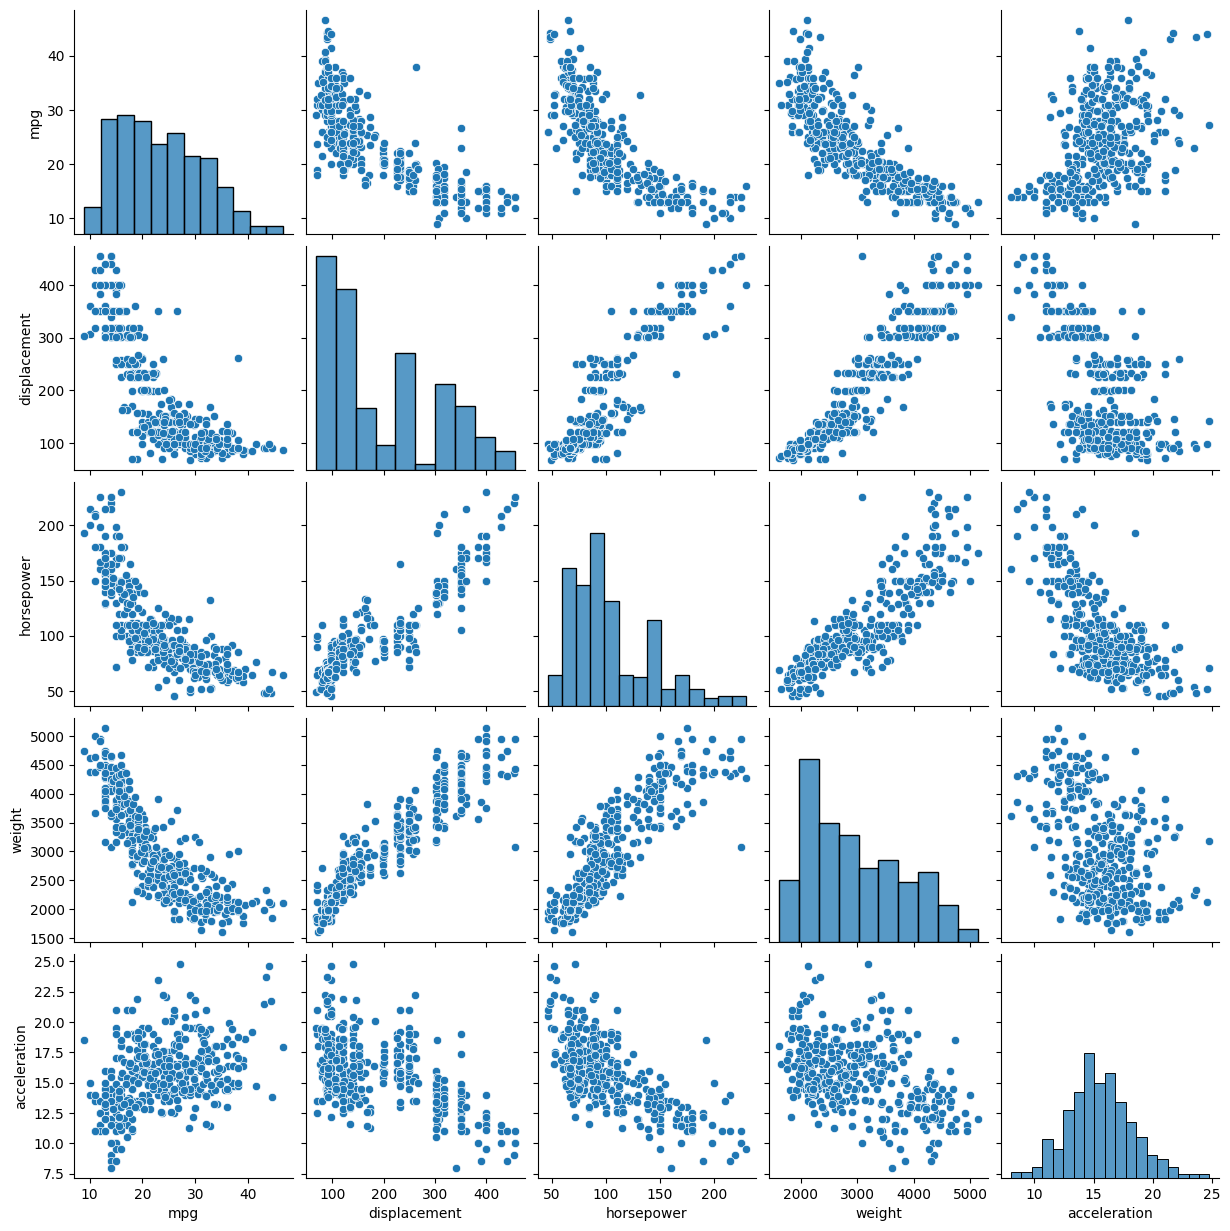

In [174]:
sns.pairplot(dataset[['mpg','displacement', 'horsepower', 'weight','acceleration']])

In [181]:
datasetXsingle=dataset[['horsepower']]
datasetXMulti=dataset[['cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model year', 'Europe','Japan','USA']]
datasetY=dataset[['mpg']]

In [182]:
# use single-variable input to fit linear regression model
model.fit(datasetXsingle,datasetY)
model.score(datasetXsingle,datasetY)


0.6059482578894348

In [183]:
# use multi-variable input to fit linear regression model

model.fit(datasetXMulti,datasetY)
model.score(datasetXMulti,datasetY)


0.8241994699119172

In [186]:
# use Normalized mlti-variable input to fit linear regression model
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
datasetXMulti=preprocessing.StandardScaler().fit_transform(datasetXMulti)

reg = SGDRegressor(max_iter=100000,tol=None).fit(datasetXMulti, datasetY)

print(reg.score(datasetXMulti, datasetY))
#print(mean_squared_error(datasetY, reg.predict(datasetXMulti)))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8241991701629721
